## Пункт а

In [1]:
from statistics import variance
from typing import List, Tuple
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt


def norm_distrib_quantile(order: float) -> float:
    return sps.norm(0, 1).ppf(order)

def chi2_distrib_quantile(df: int, order: float) -> float:
    return sps.chi2(df).ppf(order)

def get_sampling(variance: float, n: int) -> np.array:
    return np.random.normal(0, variance, n)

def confidence_range_len_2(sampling: np.array, order: float) -> float:
    avg = np.average(sampling)
    assert norm_distrib_quantile((3 + order) / 4.0) ** 2 != 0
    left = len(sampling) * avg ** 2 / (norm_distrib_quantile((3 + order) / 4.0) ** 2)
    right = len(sampling) * avg ** 2 / (norm_distrib_quantile((3 - order) / 4.0) ** 2)
    return right - left

def confidence_range_len_1(sampling: np.array, order: float) -> float:
    sum = np.sum(sampling ** 2)
    left = sum / chi2_distrib_quantile(len(sampling), (1 + order) / 2)
    right = sum / chi2_distrib_quantile(len(sampling), (1 - order) / 2)
    return right - left

def draw_plot(range_len, variance: float, label: str):
    xs = np.arange(5, 1000, 10, dtype=np.int64)
    ys = [np.mean(np.array([range_len(get_sampling(variance, n), 0.9) for i in range(100)])) for n in xs]
    plt.plot(xs, ys, label=label + f', variance={variance}')
    plt.legend()
    plt.show()

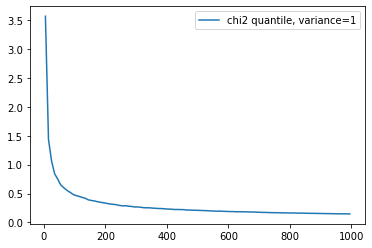

In [2]:
draw_plot(confidence_range_len_1, 1, "chi2 quantile")


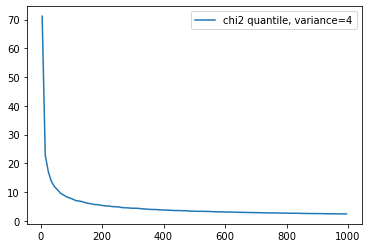

In [3]:
draw_plot(confidence_range_len_1, 4, "chi2 quantile")


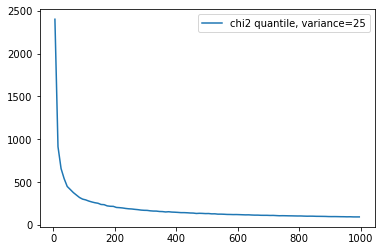

In [4]:
draw_plot(confidence_range_len_1, 25, "chi2 quantile")


Видно, что с ростом выборки длина интервала уменьшается, хотя и не особо бытсро (особенно в случае большой дисперсии). При этом длина интервала очень сильно зависит от дисперсии и быстро растет по ней.

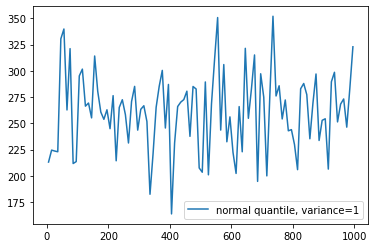

In [5]:
draw_plot(confidence_range_len_2, 1, "normal quantile")


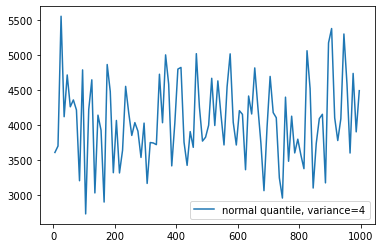

In [6]:
draw_plot(confidence_range_len_2, 4, "normal quantile")


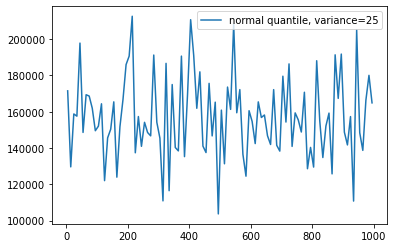

In [7]:
draw_plot(confidence_range_len_2, 25, "normal quantile")

Здесь тоже можно заметить, что с ростом дисперсии растет и длина интервала, но здесь длина является вообще совсем случайной, и какие-то выводы про нее делать сложно.